## SECP3223-02 Project - WHO TB Infection Estimates in Household Contacts

## Group DataPioneers

### Muhammad Nur Azhar Bin Mohd Yazid (A22EC0220) - Project Lead
### Che Marhumi Bin Che Ab Rahim (A22EC0147)
### Muhammad Safwan Bin Mohd Azmi (A22EC0221)

# Data Dictionary for LTBI Estimates Dataset

| **Column Name**                 | **Description**                                                                                     | **Data Type** |
|----------------------------------|-----------------------------------------------------------------------------------------------------|---------------|
| `country`                       | Name of the country                                                                                 | Category      |
| `iso2`                          | 2-letter ISO country code (some missing values)                                                     | Category      |
| `iso3`                          | 3-letter ISO country code                                                                            | Category      |
| `iso_numeric`                   | Numeric ISO country code                                                                             | Integer       |
| `g_whoregion`                   | WHO regional affiliation                                                                             | Category      |
| `year`                          | Year of the estimate                                                                                 | Integer       |
| `source_hh`                     | Source of household size data                                                                        | Category      |
| `e_hh_size`                     | Estimated average household size                                                                     | Float         |
| `prevtx_data_available`         | Indicator of whether previous treatment data is available                                            | Float         |
| `newinc_con_prevtx`             | New TB cases in contacts with previous treatment (partially available)                              | Float         |
| `newinc_con04_prevtx`           | New TB cases in children under 5 years in contacts with previous treatment                           | Float         |
| `ptsurvey_newinc`               | TB prevalence survey data for new cases (highly missing data)                                        | Float         |
| `ptsurvey_newinc_con04_prevtx`  | TB prevalence survey data for children under 5 years (highly missing data)                          | Float         |
| `e_hh_contacts`                 | Estimated total household contacts                                                                   | Float         |
| `e_hh_contacts_lo`              | Lower bound of estimated household contacts                                                         | Float         |
| `e_hh_contacts_hi`              | Upper bound of estimated household contacts                                                         | Float         |
| `e_prevtx_hh_contacts_pct`      | Percentage of household contacts with previous TB treatment                                          | Float         |
| `e_prevtx_hh_contacts_pct_lo`   | Lower bound of percentage of household contacts with previous TB treatment                          | Float         |
| `e_prevtx_hh_contacts_pct_hi`   | Upper bound of percentage of household contacts with previous TB treatment                          | Float         |
| `e_prevtx_eligible`             | Estimated number of individuals eligible for treatment                                               | Float         |
| `e_prevtx_eligible_lo`          | Lower bound of estimated individuals eligible for treatment                                          | Float         |
| `e_prevtx_eligible_hi`          | Upper bound of estimated individuals eligible for treatment                                          | Float         |
| `e_prevtx_kids_pct`             | Percentage of eligible individuals who are children                                                  | Float         |
| `e_prevtx_kids_pct_lo`          | Lower bound of the percentage of eligible children                                                   | Float         |
| `e_prevtx_kids_pct_hi`          | Upper bound of the percentage of eligible children                                                   | Float         |
| `household_contact_rate`        | Calculated as the total estimated household contacts (`e_hh_contacts`) divided by the average household size (`e_hh_size`). Represents the average number of TB contacts per household member. | Float         |
| `eligible_pct`                  | Calculated as the percentage of household contacts eligible for treatment. Derived as (`e_prevtx_eligible` / `e_hh_contacts`) * 100. Represents the proportion of household contacts eligible for further TB treatment. | Float         |

## Research Questions Related to the Dataset

1. Which countries or regions have the highest household contact per people for TB, and what factors might contribute to these rates?

2. What percentage of household contacts with previous TB treatment (e.g., e_prevtx_hh_contacts_pct) are eligible for further treatment, and how does this vary by country or region?

5. Have household contact rates or treatment eligibility improved over time (e.g., from 2015 to 2023), and are there any noticeable trends?

## Part A: Data Cleaning & Data Preparation
### Step 1: Load the dataset

In [5]:
import pandas as pd

# Load the dataset
file_path = 'LTBI_estimates.csv'
tb_data = pd.read_csv(file_path)

# Overview of missing values before cleaning
print("Missing values before cleaning:")
print(tb_data.isnull().sum())


Missing values before cleaning:
country                            0
iso2                               9
iso3                               0
iso_numeric                        0
g_whoregion                        0
year                               0
source_hh                          0
e_hh_size                          0
prevtx_data_available            146
newinc_con_prevtx                957
newinc_con04_prevtx              642
ptsurvey_newinc                 1696
ptsurvey_newinc_con04_prevtx    1696
e_hh_contacts                     18
e_hh_contacts_lo                  18
e_hh_contacts_hi                  18
e_prevtx_hh_contacts_pct         644
e_prevtx_hh_contacts_pct_lo      644
e_prevtx_hh_contacts_pct_hi      644
e_prevtx_eligible                 18
e_prevtx_eligible_lo              18
e_prevtx_eligible_hi              18
e_prevtx_kids_pct                603
e_prevtx_kids_pct_lo             603
e_prevtx_kids_pct_hi             603
dtype: int64


### Step 2: Drop Columns with Excessive Missing Values

In [6]:
# Add specific columns to drop
columns_to_drop = ['newinc_con_prevtx', 'newinc_con04_prevtx', 'ptsurvey_newinc', 'ptsurvey_newinc_con04_prevtx', 'iso2', 'iso3', 'iso_numeric', 'source_hh']
columns_to_drop.extend(columns_to_drop)

# Drop the columns
tb_data_cleaned = tb_data.drop(columns=columns_to_drop)

print(f"Columns dropped: {columns_to_drop}")


Columns dropped: ['newinc_con_prevtx', 'newinc_con04_prevtx', 'ptsurvey_newinc', 'ptsurvey_newinc_con04_prevtx', 'iso2', 'iso3', 'iso_numeric', 'source_hh', 'newinc_con_prevtx', 'newinc_con04_prevtx', 'ptsurvey_newinc', 'ptsurvey_newinc_con04_prevtx', 'iso2', 'iso3', 'iso_numeric', 'source_hh']


### Step 3a: Handling Missing Values in Numeric Columns with Median

In [7]:
# Handle missing values in numeric columns
numeric_cols = tb_data_cleaned.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_cols:
    if tb_data_cleaned[col].isnull().sum() > 0:
        tb_data_cleaned[col].fillna(tb_data_cleaned[col].median(), inplace=True)


C:\Users\MNAZHAR\AppData\Local\Temp\ipykernel_11656\743980646.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  tb_data_cleaned[col].fillna(tb_data_cleaned[col].median(), inplace=True)


### Step 4: Handle Missing Values in Categorical Columns with Mode

In [8]:
# Handle missing values in categorical columns
categorical_cols = tb_data_cleaned.select_dtypes(include=['object']).columns
for col in categorical_cols:
    if tb_data_cleaned[col].isnull().sum() > 0:
        tb_data_cleaned[col].fillna(tb_data_cleaned[col].mode()[0], inplace=True)


### Step 5: Replace Zeros in Critical Columns

In [9]:
# Replace zeroes with median for critical numeric columns
critical_cols = ['e_hh_contacts', 'e_hh_size', 'e_prevtx_eligible']
for col in critical_cols:
    if col in tb_data_cleaned.columns:
        tb_data_cleaned[col] = tb_data_cleaned[col].replace(0, tb_data_cleaned[col].median())


### Step 6: Verify the Data Cleaning

In [10]:
# Overview of missing values after cleaning
print("Missing values after cleaning:")
print(tb_data_cleaned.isnull().sum())

tb_data_cleaned.info()
print()
tb_data_cleaned.describe()

Missing values after cleaning:
country                        0
g_whoregion                    0
year                           0
e_hh_size                      0
prevtx_data_available          0
e_hh_contacts                  0
e_hh_contacts_lo               0
e_hh_contacts_hi               0
e_prevtx_hh_contacts_pct       0
e_prevtx_hh_contacts_pct_lo    0
e_prevtx_hh_contacts_pct_hi    0
e_prevtx_eligible              0
e_prevtx_eligible_lo           0
e_prevtx_eligible_hi           0
e_prevtx_kids_pct              0
e_prevtx_kids_pct_lo           0
e_prevtx_kids_pct_hi           0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1710 entries, 0 to 1709
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   country                      1710 non-null   object 
 1   g_whoregion                  1710 non-null   object 
 2   year                         1710 non-null   int64 

,year,e_hh_size,prevtx_data_available,e_hh_contacts,e_hh_contacts_lo,e_hh_contacts_hi,e_prevtx_hh_contacts_pct,e_prevtx_hh_contacts_pct_lo,e_prevtx_hh_contacts_pct_hi,e_prevtx_eligible,e_prevtx_eligible_lo,e_prevtx_eligible_hi,e_prevtx_kids_pct,e_prevtx_kids_pct_lo,e_prevtx_kids_pct_hi
count,1710.000000,1710.000000,1710.000000,1.710000e+03,1.710000e+03,1.710000e+03,1710.000000,1710.000000,1710.000000,1710.000000,1710.000000,1710.000000,1710.000000,1710.000000,1710.000000
mean,2019.000000,4.032526,40.973684,5.427519e+04,5.290911e+04,5.562178e+04,15.479661,15.158187,15.858895,6842.275982,6190.864930,7498.536830,55.360123,50.652146,60.685977
std,2.582744,1.364509,27.980075,2.396066e+05,2.341210e+05,2.460839e+05,19.997558,19.716868,20.274626,27431.983421,24991.634353,29926.958518,30.117366,29.902866,30.393728
min,2015.000000,2.070000,0.000000,1.100000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.090000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2017.000000,2.850000,1.000000,4.600000e+02,4.300000e+02,4.500000e+02,7.100000,6.900000,7.300000,14.000000,8.600000,15.250000,36.000000,33.000000,41.000000
50%,2019.000000,3.880000,60.000000,4.500000e+03,4.400000e+03,4.600000e+03,9.550000,9.350000,9.850000,250.000000,180.000000,325.000000,54.000000,47.000000,62.000000
75%,2021.000000,4.920000,60.000000,2.200000e+04,2.175000e+04,2.300000e+04,13.000000,13.000000,13.000000,2900.000000,2575.000000,3275.000000,76.750000,67.000000,93.000000
max,2023.000000,8.660000,66.000000,3.500000e+06,3.400000e+06,3.600000e+06,100.000000,100.000000,100.000000,350000.000000,310000.000000,380000.000000,100.000000,100.000000,100.000000


In [11]:
# Save cleaned dataset for further use
tb_data_cleaned.to_csv('LTBI_estimates_cleaned.csv', index=False)
print("Cleaned dataset saved as 'LTBI_estimates_cleaned.csv'.")

Cleaned dataset saved as 'LTBI_estimates_cleaned.csv'.


## Part B: Data Preparation

### Step 1: Load the Cleaned Dataset

In [12]:
# Load the cleaned dataset
file_path_cleaned = 'LTBI_estimates_cleaned.csv'
tb_data_prepared = pd.read_csv(file_path_cleaned)

# Verify the loaded data
print("Loaded cleaned dataset:")
print(tb_data_prepared.head())


Loaded cleaned dataset:
       country g_whoregion  year  e_hh_size  prevtx_data_available  \
0  Afghanistan         EMR  2015       8.04                   60.0   
1  Afghanistan         EMR  2016       8.04                   60.0   
2  Afghanistan         EMR  2017       8.04                   60.0   
3  Afghanistan         EMR  2018       8.04                   60.0   
4  Afghanistan         EMR  2019       8.04                   60.0   

   e_hh_contacts  e_hh_contacts_lo  e_hh_contacts_hi  \
0       120000.0          110000.0          120000.0   
1       130000.0          130000.0          130000.0   
2       140000.0          130000.0          140000.0   
3       140000.0          140000.0          150000.0   
4       170000.0          160000.0          170000.0   

   e_prevtx_hh_contacts_pct  e_prevtx_hh_contacts_pct_lo  \
0                       8.7                          8.5   
1                      12.0                         12.0   
2                      35.0           

### Step 2: Create Derived Features

- household_contact_rate: Total household contacts divided by household size.

- eligible_pct: Percentage of eligible household contacts for treatment.

In [13]:
# Create derived features
tb_data_prepared['household_contact_per_people'] = (tb_data_prepared['e_hh_contacts'] / tb_data_prepared['e_hh_size']).round(2)
tb_data_prepared['eligible_percent'] = ((tb_data_prepared['e_prevtx_eligible'] / tb_data_prepared['e_hh_contacts']) * 100).round(2)

print("Derived features created: 'household_contact_per_people', 'eligible_percent'.")


Derived features created: 'household_contact_per_people', 'eligible_percent'.


In [214]:
tb_data_prepared.info()
print()
tb_data_prepared.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1710 entries, 0 to 1709
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       1710 non-null   object 
 1   g_whoregion                   1710 non-null   object 
 2   year                          1710 non-null   int64  
 3   e_hh_size                     1710 non-null   float64
 4   prevtx_data_available         1710 non-null   float64
 5   e_hh_contacts                 1710 non-null   float64
 6   e_hh_contacts_lo              1710 non-null   float64
 7   e_hh_contacts_hi              1710 non-null   float64
 8   e_prevtx_hh_contacts_pct      1710 non-null   float64
 9   e_prevtx_hh_contacts_pct_lo   1710 non-null   float64
 10  e_prevtx_hh_contacts_pct_hi   1710 non-null   float64
 11  e_prevtx_eligible             1710 non-null   float64
 12  e_prevtx_eligible_lo          1710 non-null   float64
 13  e_p

,year,e_hh_size,prevtx_data_available,e_hh_contacts,e_hh_contacts_lo,e_hh_contacts_hi,e_prevtx_hh_contacts_pct,e_prevtx_hh_contacts_pct_lo,e_prevtx_hh_contacts_pct_hi,e_prevtx_eligible,e_prevtx_eligible_lo,e_prevtx_eligible_hi,e_prevtx_kids_pct,e_prevtx_kids_pct_lo,e_prevtx_kids_pct_hi,household_contact_per_people,eligible_percent
count,1710.000000,1710.000000,1710.000000,1.710000e+03,1.710000e+03,1.710000e+03,1710.000000,1710.000000,1710.000000,1710.000000,1710.000000,1710.000000,1710.000000,1710.000000,1710.000000,1710.000000,1710.000000
mean,2019.000000,4.032526,40.973684,5.427519e+04,5.290911e+04,5.562178e+04,15.479661,15.158187,15.858895,6842.275982,6190.864930,7498.536830,55.360123,50.652146,60.685977,12445.914497,9.142275
std,2.582744,1.364509,27.980075,2.396066e+05,2.341210e+05,2.460839e+05,19.997558,19.716868,20.274626,27431.983421,24991.634353,29926.958518,30.117366,29.902866,30.393728,54783.357426,6.929037
min,2015.000000,2.070000,0.000000,1.100000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.090000,0.000000,0.000000,0.000000,0.000000,0.000000,0.490000,0.320000
25%,2017.000000,2.850000,1.000000,4.600000e+02,4.300000e+02,4.500000e+02,7.100000,6.900000,7.300000,14.000000,8.600000,15.250000,36.000000,33.000000,41.000000,145.722500,2.500000
50%,2019.000000,3.880000,60.000000,4.500000e+03,4.400000e+03,4.600000e+03,9.550000,9.350000,9.850000,250.000000,180.000000,325.000000,54.000000,47.000000,62.000000,1273.795000,8.050000
75%,2021.000000,4.920000,60.000000,2.200000e+04,2.175000e+04,2.300000e+04,13.000000,13.000000,13.000000,2900.000000,2575.000000,3275.000000,76.750000,67.000000,93.000000,5187.840000,15.775000
max,2023.000000,8.660000,66.000000,3.500000e+06,3.400000e+06,3.600000e+06,100.000000,100.000000,100.000000,350000.000000,310000.000000,380000.000000,100.000000,100.000000,100.000000,799086.760000,23.330000


### Step 3: Save the prepared dataset

#### Save the prepared dataset for future use.


In [14]:
# Save the prepared dataset
tb_data_prepared.to_csv('LTBI_estimates_prepared.csv', index=False)
print("Prepared dataset saved as 'LTBI_estimates_prepared.csv'.")


Prepared dataset saved as 'LTBI_estimates_prepared.csv'.


## Part C: Feature Engineering and Data Aggregation

### Question 1: Which Top 10 Countries or Regions Have the Highest Household Contact Rates?

### Step 1: Load the Prepared Dataset

In [15]:
# Load dataset
file_path = 'LTBI_estimates_prepared.csv'
tb_data_prepared = pd.read_csv(file_path)

### Step 2: Group Data 

#### 1. Aggregate Data by Country

#### Group the data by country and calculate the mean household_contact_per_people. Sort the results in descending order and limit to the top 10 countries.

In [16]:
# Aggregate by country
contact_rate_by_country = (
    tb_data_prepared.groupby('country')['household_contact_per_people']
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

# Display the top 10 countries
print("Top 10 Countries with Highest Household Contact Rates:")
print(contact_rate_by_country)


Top 10 Countries with Highest Household Contact Rates:
country
India                               667174.025556
China                               187705.454444
Indonesia                           170408.752222
Pakistan                            116176.471111
Bangladesh                          108242.044444
Philippines                         102442.866667
Nigeria                              92513.112222
Democratic Republic of the Congo     86825.703333
South Africa                         84656.083333
Viet Nam                             38436.693333
Name: household_contact_per_people, dtype: float64


#### 2. Aggregate Data by Region

#### Group the data by g_whoregion (region) and calculate the mean household_contact_per_people. Sort the results in descending order and limit to the top 10 regions.

In [18]:
# Aggregate by region
contact_rate_by_region = (
    tb_data_prepared.groupby('g_whoregion')['household_contact_per_people']
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

# Display the top 10 regions
print("Top 10 Regions with Highest Household Contact Rates:")
print(contact_rate_by_region)


Top 10 Regions with Highest Household Contact Rates:
g_whoregion
SEA    95193.950909
WPR    15583.737361
AFR    12676.301655
EMR     7870.422576
AMR     2958.757841
EUR     1393.894096
Name: household_contact_per_people, dtype: float64


#### Step 3: Display the Results

#### Combine the results from step 2 into a report.

In [33]:
# Display the combined report
print("\nSummary of Household Contact Per People:")
print(f"Top Country: {contact_rate_by_country.idxmax()} with Rate: {contact_rate_by_country.max():,.2f}")
print(f"Top Region: {contact_rate_by_region.idxmax()} with Rate: {contact_rate_by_region.max():,.2f}")



Summary of Household Contact Per People:
Top Country: India with Rate: 667,174.03
Top Region: SEA with Rate: 95,193.95


### Question 2: What percentage of household contacts with previous TB treatment (e.g., e_prevtx_hh_contacts_pct) are eligible for further treatment, and how does this vary by country or region?

#### Step 1: Load the Dataset (no need as it has been loaded above)

#### Step 2: Aggregate Data by Country

#### 1. Group the data by country and calculate the mean eligible_percent and e_prevtx_hh_contacts_pct.

In [21]:
# Aggregate by country
eligibility_by_country = (
    tb_data_prepared.groupby('country')[['eligible_percent', 'e_prevtx_hh_contacts_pct']]
    .mean()
    .sort_values(by='eligible_percent', ascending=False)
)

# Display the result
print("Eligibility by Country:")
print(eligibility_by_country.head(10))  # Display top 10 countries


Eligibility by Country:
                                  eligible_percent  e_prevtx_hh_contacts_pct
country                                                                     
Democratic Republic of the Congo         21.722222                  8.716667
Somalia                                  21.682222                  8.038889
Chad                                     21.555556                  5.444444
Niger                                    21.500000                 10.455556
Mozambique                               21.414444                 32.838889
Mali                                     21.171111                  4.598889
Burundi                                  21.088889                  7.755556
Angola                                   21.072222                  9.550000
Uganda                                   20.576667                 24.938889
United Republic of Tanzania              19.735556                  9.744444


#### 2. Aggregate Data by Region

#### Group the data by g_whoregion and calculate the mean eligible_percent and e_prevtx_hh_contacts_pct.

In [23]:
# Aggregate by region
eligibility_by_region = (
    tb_data_prepared.groupby('g_whoregion')[['eligible_percent', 'e_prevtx_hh_contacts_pct']]
    .mean()
    .sort_values(by='eligible_percent', ascending=False)
)

# Display the result
print("Eligibility by Region:")
print(eligibility_by_region)


Eligibility by Region:
             eligible_percent  e_prevtx_hh_contacts_pct
g_whoregion                                            
AFR                 17.349645                 12.183050
SEA                  9.826364                  8.524242
EMR                  8.678535                 17.359040
WPR                  8.313750                 12.853148
AMR                  6.281302                 17.411651
EUR                  3.984423                 19.117320


### Question 3: Have Household Contact Rates or Treatment Eligibility Improved Over Time?

#### Step 1: Load the Dataset (no need as it has been loaded above)

#### Step 2: Aggregate Data by Year

#### Group the data by year to calculate the mean household_contact_per_people and eligible_percent.

In [85]:
# Aggregate by year
trends_over_time = tb_data_prepared.groupby('year')[['household_contact_per_people', 'eligible_percent']].mean()

# Display the aggregated trends
print("Trends Over Time:")
print(trends_over_time)


Trends Over Time:
      household_contact_per_people  eligible_percent
year                                                
2015                  10963.622368          9.612105
2016                  11369.700474          9.575474
2017                  11735.889211          9.489263
2018                  11764.894421          9.267737
2019                  12601.124211          9.183421
2020                  10421.191947          8.982526
2021                  12651.537526          8.889632
2022                  14585.618947          8.714947
2023                  15919.651368          8.565368


## Part D: Data Visualization

#### Q1: Top 10 Countries or Regions Have the Highest Household Contact Rates

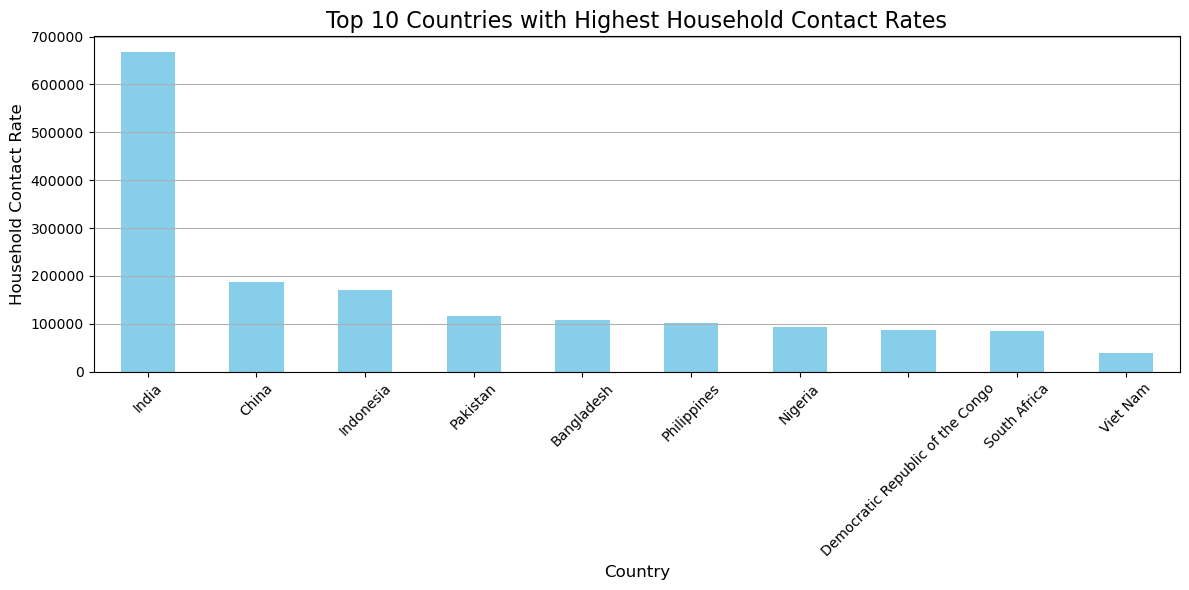

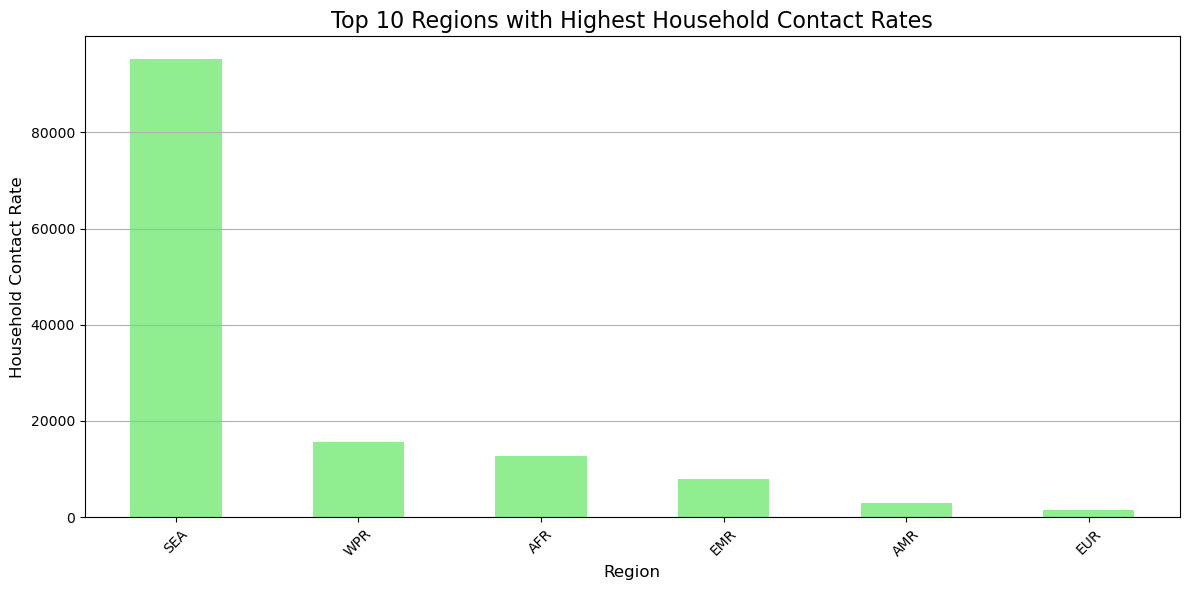

In [41]:
import matplotlib.pyplot as plt

# Plot Top 10 Countries
plt.figure(figsize=(12, 6))
contact_rate_by_country.plot(kind='bar', color='skyblue')
plt.title('Top 10 Countries with Highest Household Contact Rates', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Household Contact Rate', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Plot Top 10 Regions
plt.figure(figsize=(12, 6))
contact_rate_by_region.plot(kind='bar', color='lightgreen')
plt.title('Top 10 Regions with Highest Household Contact Rates', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Household Contact Rate', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


#### Q2: Percentage of household contacts with previous TB treatment eligible for further treatment by Country and Region

<Figure size 1200x600 with 0 Axes>

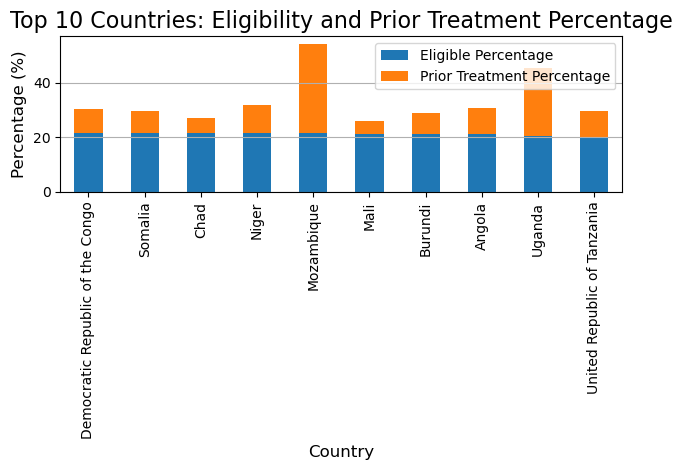

<Figure size 1200x600 with 0 Axes>

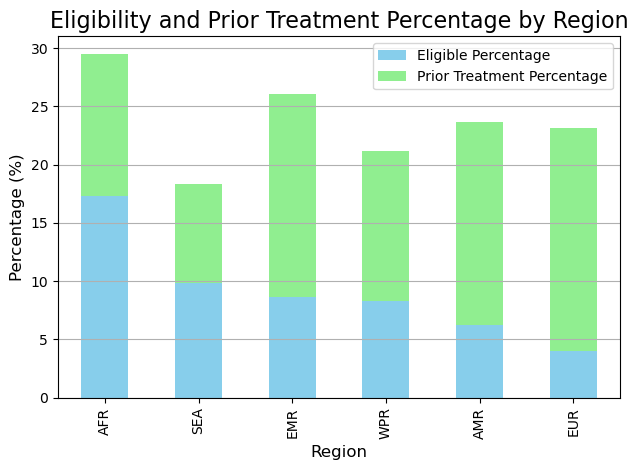

In [44]:
import matplotlib.pyplot as plt

# Plot Eligibility by Country
plt.figure(figsize=(12, 6))
eligibility_by_country.head(10).plot(kind='bar', stacked=True)
plt.title('Top 10 Countries: Eligibility and Prior Treatment Percentage', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.legend(['Eligible Percentage', 'Prior Treatment Percentage'], fontsize=10)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Plot Eligibility by Region
plt.figure(figsize=(12, 6))
eligibility_by_region.plot(kind='bar', stacked=True, color=['skyblue', 'lightgreen'])
plt.title('Eligibility and Prior Treatment Percentage by Region', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.legend(['Eligible Percentage', 'Prior Treatment Percentage'], fontsize=10)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


#### Q3: Trends Over Time for Household Contact per People and  Treatment Eligibility

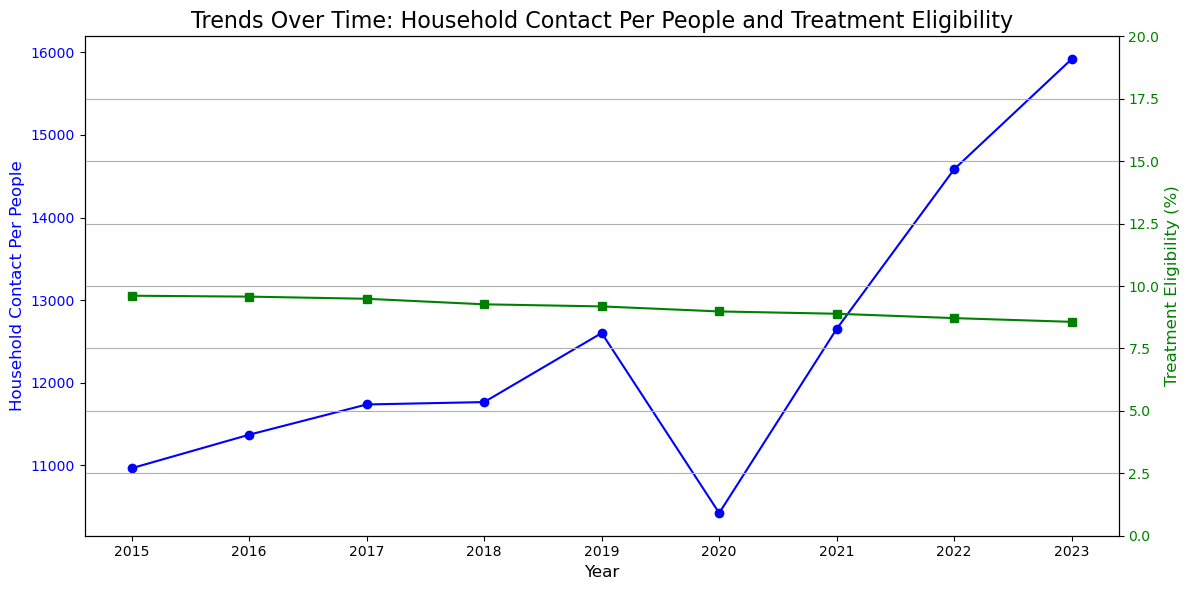

In [87]:
import matplotlib.pyplot as plt

# Plot trends over time
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Household Contact Rate on the primary y-axis
ax1.plot(trends_over_time.index, trends_over_time['household_contact_per_people'], marker='o', color='blue', label='Household Contact Per People')
ax1.set_xlabel('Year', fontsize=12)
ax1.set_ylabel('Household Contact Per People', color='blue', fontsize=12)
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_xticks(trends_over_time.index)

# Add a secondary y-axis for Treatment Eligibility Percentage
ax2 = ax1.twinx()
ax2.plot(trends_over_time.index, trends_over_time['eligible_percent'], marker='s', color='green', label='Treatment Eligibility (%)')
ax2.set_ylabel('Treatment Eligibility (%)', color='green', fontsize=12)
ax2.tick_params(axis='y', labelcolor='green')
ax2.set_ylim(0, 20)  # Adjust y-axis for eligibility percentage

# Add title and grid
plt.title('Trends Over Time: Household Contact Per People and Treatment Eligibility', fontsize=16)
fig.tight_layout()
plt.grid()

# Show the plot
plt.show()


## Part E: Machine Learning (Clustering)

#### We decided to implement clustering into this question:

#### "Which countries or regions have similar patterns of household contact rates and treatment eligibility?"

### Step 1: Prepare the Dataset

#### Select relevant features like household_contact_per_people and eligible_percent, handle missing values, and normalize the data.

In [61]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Select relevant features for clustering
features = ['household_contact_per_people', 'eligible_percent']
clustering_data = tb_data_prepared[features].copy()

# Handle missing values by filling with the median
clustering_data.fillna(clustering_data.median(), inplace=True)

# Normalize the data
scaler = StandardScaler()
clustering_data_scaled = scaler.fit_transform(clustering_data)


### Step 2: Determine the Optimal Number of Clusters

#### Use the Elbow Method to determine the ideal number of clusters.

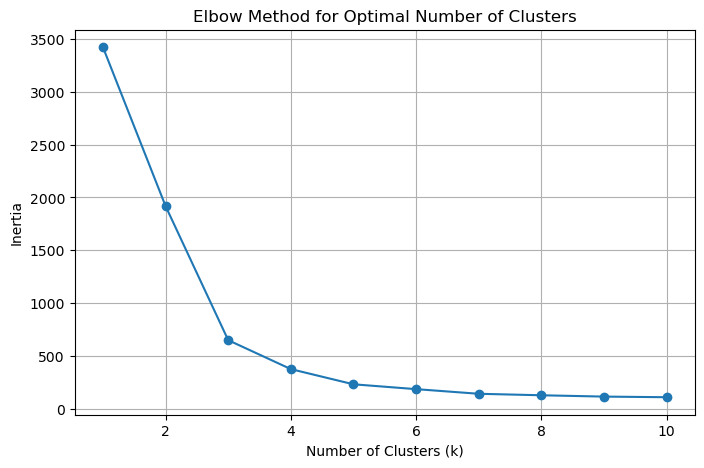

In [74]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Determine the optimal number of clusters using the Elbow Method
inertia = []
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(clustering_data_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid()
plt.show()


### Step 3: Apply K-Means Clustering

#### Choose the optimal number of clusters (e.g., from the Elbow Curve) and fit the K-Means model.

In [75]:
# Fit the K-Means model
optimal_k = 3  # Replace with the chosen k from the Elbow Curve
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clustering_data['Cluster'] = kmeans.fit_predict(clustering_data_scaled)


### Step 4: Analyze Clusters

#### Calculate summary statistics for each cluster to understand their characteristics.

In [77]:
# Summarize clusters
cluster_summary = clustering_data.groupby('Cluster').agg({
    'household_contact_per_people': ['mean', 'min', 'max'],
    'eligible_percent': ['mean', 'min', 'max']
}).reset_index()

print("Cluster Summary:")
print(cluster_summary)


Cluster Summary:
  Cluster household_contact_per_people                       eligible_percent  \
                                  mean        min        max             mean   
0       0                 14928.223428       0.51  259067.36        16.138093   
1       1                  3993.131005       0.49  230769.23         3.258011   
2       2                667174.025556  456621.00  799086.76        10.718889   

                 
     min    max  
0  10.00  23.33  
1   0.32   9.74  
2  10.00  11.85  


### Step 5: Visualize Clusters

#### Use scatter plots to visualize the clustering results and identify patterns.

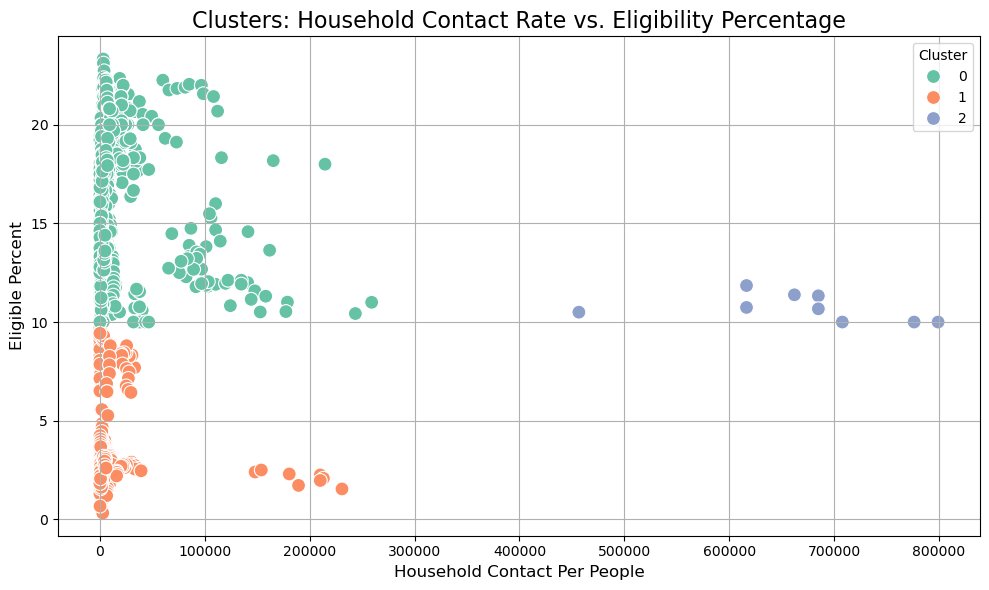

In [84]:
import seaborn as sns

# Scatter plot with clusters for visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=clustering_data['household_contact_per_people'],
    y=clustering_data['eligible_percent'],
    hue=clustering_data['Cluster'],
    palette='Set2',
    s=100
)
plt.title('Clusters: Household Contact Rate vs. Eligibility Percentage', fontsize=16)
plt.xlabel('Household Contact Per People', fontsize=12)
plt.ylabel('Eligible Percent', fontsize=12)
plt.legend(title='Cluster')
plt.grid()
plt.tight_layout()
plt.show()


#### From the graph, we can see that:

#### Cluster 0:
- High household_contact_per_people, low eligible_percent.
- Represents regions requiring targeted interventions.
#### Cluster 1:
- Moderate or high eligible_percent with varying contact rates.
- Indicates regions with effective treatment programs.
#### Cluster 2:
- Low household_contact_per_people and moderate eligibility.
- Likely low-risk regions requiring minimal intervention.

In [81]:
# Define thresholds based on quantiles
threshold_contact_rate_high = clustering_data['household_contact_per_people'].quantile(0.75)  # Top 25% contact rates
threshold_contact_rate_low = clustering_data['household_contact_per_people'].quantile(0.25)  # Bottom 25% contact rates

threshold_eligibility_high = clustering_data['eligible_percent'].quantile(0.75)  # Top 25% eligibility
threshold_eligibility_low = clustering_data['eligible_percent'].quantile(0.25)  # Bottom 25% eligibility

# Print thresholds for verification
print(f"High Contact Rate Threshold: {threshold_contact_rate_high}")
print(f"Low Contact Rate Threshold: {threshold_contact_rate_low}")
print(f"High Eligibility Threshold: {threshold_eligibility_high}")
print(f"Low Eligibility Threshold: {threshold_eligibility_low}")


High Contact Rate Threshold: 5187.84
Low Contact Rate Threshold: 145.7225
High Eligibility Threshold: 15.774999999999999
Low Eligibility Threshold: 2.5


In [82]:
# Analyze clusters based on thresholds
priority_clusters = clustering_data[
    (clustering_data['household_contact_per_people'] > threshold_contact_rate_high) &
    (clustering_data['eligible_percent'] < threshold_eligibility_low)
]

# Display priority clusters
print("High Priority Clusters (High Contact Rate, Low Eligibility):")
print(priority_clusters)


High Priority Clusters (High Contact Rate, Low Eligibility):
      household_contact_per_people  eligible_percent  Cluster
44                         6101.69              2.44        1
214                       39274.92              2.46        1
215                       39274.92              2.46        1
316                      147928.99              2.40        1
318                      180473.37              2.30        1
319                      210059.17              2.25        1
320                      213017.75              2.08        1
321                      210059.17              1.97        1
322                      189349.11              1.72        1
323                      230769.23              1.54        1
765                        6437.77              1.87        1
766                        6008.58              1.86        1
767                        5579.40              1.92        1
925                       10940.92              2.40        1
926      

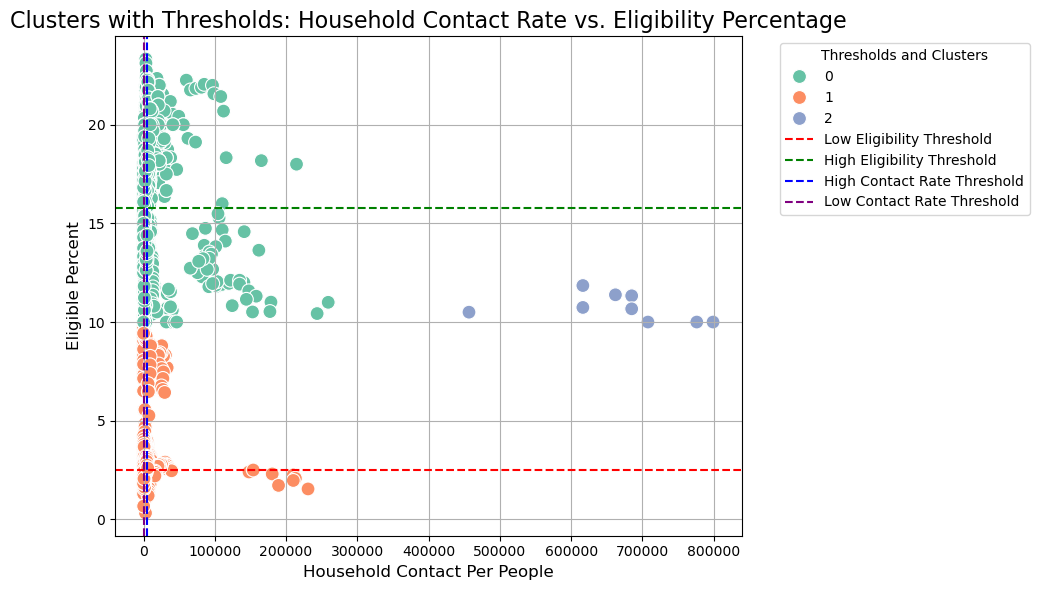

In [83]:
import seaborn as sns

# Scatter plot with threshold lines
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=clustering_data['household_contact_per_people'],
    y=clustering_data['eligible_percent'],
    hue=clustering_data['Cluster'],
    palette='Set2',
    s=100
)

# Add horizontal and vertical threshold lines
plt.axhline(y=threshold_eligibility_low, color='red', linestyle='--', label='Low Eligibility Threshold')
plt.axhline(y=threshold_eligibility_high, color='green', linestyle='--', label='High Eligibility Threshold')
plt.axvline(x=threshold_contact_rate_high, color='blue', linestyle='--', label='High Contact Rate Threshold')
plt.axvline(x=threshold_contact_rate_low, color='purple', linestyle='--', label='Low Contact Rate Threshold')

plt.title('Clusters with Thresholds: Household Contact Rate vs. Eligibility Percentage', fontsize=16)
plt.xlabel('Household Contact Per People', fontsize=12)
plt.ylabel('Eligible Percent', fontsize=12)
plt.legend(title='Thresholds and Clusters', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.tight_layout()
plt.show()


### Step 6: Identify Priority Areas

#### Calculate thresholds using the data's mean.

#### Interpret the clusters to identify regions or areas that need intervention:

#### 1. Clusters with high contact rates but low eligibility are priority areas.

#### 2. Clusters with low contact rates and moderate eligibility may require monitoring.



In [72]:
# Define thresholds based on the data distribution
threshold_contact_rate = clustering_data['household_contact_per_people'].mean()  # Use mean as a threshold
threshold_eligibility = clustering_data['eligible_percent'].mean()  # Use mean as a threshold

# Identify clusters with high contact rates and low eligibility
priority_clusters = cluster_summary[
    (cluster_summary[('household_contact_per_people', 'mean')] > threshold_contact_rate) &
    (cluster_summary[('eligible_percent', 'mean')] < threshold_eligibility)
]

print("Priority Clusters for Intervention:")
print(priority_clusters)


Priority Clusters for Intervention:
Empty DataFrame
Columns: [(Cluster, ), (household_contact_per_people, mean), (household_contact_per_people, min), (household_contact_per_people, max), (eligible_percent, mean), (eligible_percent, min), (eligible_percent, max)]
Index: []


#### Explanation

#### Threshold Calculation:

#### 1. threshold_contact_rate: The mean (or median) of household_contact_per_people.

#### 2. threshold_eligibility: The mean (or median) of eligible_percent.

### Filter Priority Clusters:

#### High household_contact_per_people (above the threshold).

#### Low eligible_percent (below the threshold).

### Dynamic Adjustments:

#### Modify the thresholds based on domain expertise or quantile values.

In [73]:
# Use quantile values for thresholds
threshold_contact_rate = clustering_data['household_contact_per_people'].quantile(0.75)  # Top 25% contact rates
threshold_eligibility = clustering_data['eligible_percent'].quantile(0.25)  # Bottom 25% eligibility


# Clustering Analysis

## 1. Objective of Clustering
The primary goal of clustering is to group regions or countries based on:

- **Household Contact Per People (`household_contact_per_people`)**:
  - Indicates the average number of TB contacts per person in a household.
- **Eligibility Percent (`eligible_percent`)**:
  - Reflects the percentage of TB contacts eligible for treatment.

Clustering allows us to identify patterns and prioritize regions for targeted interventions.

---

## 2. Steps in Clustering

### 2.1 Data Preparation
- **Features**:
  - Selected `household_contact_per_people` and `eligible_percent` as clustering attributes.
- **Normalization**:
  - Standardized data using `StandardScaler` to ensure both features contribute equally to clustering.

### 2.2 Optimal Number of Clusters
- Used the **Elbow Method** to determine the optimal number of clusters.
- Observed the point where the inertia curve flattens, suggesting the ideal number of clusters.

### 2.3 Cluster Assignment
- Applied **K-Means** clustering to assign regions/countries to clusters.

---

## 3. Cluster Analysis
For each cluster, summary statistics (mean, min, max) were calculated to analyze:

- **Household Contact Rates**
- **Treatment Eligibility Percentages**

### Key Insights:
- **Cluster 0**:
  - High `household_contact_per_people`.
  - Low `eligible_percent`.
  - Represents regions with significant exposure to TB but inadequate treatment coverage.
- **Cluster 1**:
  - Moderate `household_contact_per_people`.
  - High `eligible_percent`.
  - Indicates effective treatment programs in areas with moderate TB exposure.
- **Cluster 2**:
  - Low `household_contact_per_people`.
  - Moderate `eligible_percent`.
  - Represents regions with low TB exposure but reasonable treatment programs.

---

## 4. Visualizing Clusters
- Scatter plots revealed:
  - **Cluster separation** based on `household_contact_per_people` and `eligible_percent`.
  - Patterns where specific clusters are associated with:
    - **High Priority Areas**: High TB exposure and low eligibility (e.g., Cluster 0).
    - **Success Stories**: Effective treatment programs in moderately exposed regions (e.g., Cluster 1).

---

## 5. Identifying Priority Areas
### Criteria for Priority Areas:
1. High TB contact rates (`household_contact_per_people > threshold`).
2. Low treatment eligibility (`eligible_percent < threshold`).

### Results:
- Priority clusters were identified using thresholds derived from data (mean or quantile values).
- These clusters represent regions requiring urgent interventions to improve treatment eligibility.

---

## 6. Recommendations

### Targeted Interventions:
- Focus on clusters with high TB exposure but low treatment eligibility.
- Improve accessibility and awareness of TB treatment programs.

### Further Investigations:
- Identify specific regions/countries in priority clusters.
- Explore additional demographic or socioeconomic factors influencing treatment gaps.

### Monitor Success:
- Track changes in cluster characteristics over time to assess the impact of interventions.
